# 날씨 데이타 크롤링

In [1]:
%run crawling_temparature.py

기상청에서 날씨정보를 가져오는 중입니다. 잠시 기다려주세요.
크롤링 중..
2016-06 ~ 2018-10 의 월평균 기온 정보가 해당 디렉토리에 text파일로 성공적으로 저장되었습니다.
크롤링에 소요된 시간은 8.27초 입니다.


-----------------------------------------------------------------------------
해당 웹페이지에서 월평균 기온의 데이터는 아래의 형태로 저장되어 있습니다.
<tr>
<td scope="row">평균</td>
<td>-4.0</td>
<td>-1.6</td>
<td>8.1</td>
<td>13.0</td>
<td>18.2</td>
<td>23.1</td>
<td>27.8</td>
<td>28.8</td>
<td>21.5</td>
<td>13.1</td>
<td>7.8</td>
<td>-0.6</td>
</tr>


# Dataframe column 생성, 추가 및 삭제

In [2]:
from utility import build_DataFrame_from_text, add_TextData_to_DataFrame
from analyzer import Analyzer, BarPlotMean, PiePlotMean, LinePlot, SpiderPlot
import pprint
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# textfile의 데이터를 가져와 cafehero DataFrame 생성
cafehero = build_DataFrame_from_text("C:\\Users\\juho3\\Desktop\\Python\\Fundamental_BigData_programming_course\\20121277_김주호_FinalProject\\Data\\cafehero_sales.txt")

# 사용하지 않을 지표들 drop
cafehero = cafehero.drop(['영업월', '취소', '취소금액', '현금취소건수', '현금취소금액', '카드취소건수', '카드취소금액'], axis = 1)

# 새로운 지표들 생성
cafehero['순매출'] = cafehero['총매출'] - (cafehero['할인'] + cafehero['부가세'])
cafehero['객단가'] = list(map(int, cafehero['총매출'] / cafehero['고객수']))
cafehero['현금매출비율'] = round(cafehero['현금영수금액'] / (cafehero['현금영수금액'] + cafehero['카드영수금액']) * 100, 1)

# 월평균 기온 textfile의 데이터를 cafehero 데이터에 추가함
cafehero = add_TextData_to_DataFrame("C:\\Users\\juho3\\Desktop\\Python\\Fundamental_BigData_programming_course\\20121277_김주호_FinalProject\\Data\\averages_monthly_temperature.txt", cafehero, "월평균기온")

a = Analyzer(cafehero, '2016-06', '2018-10', ['고객수', '총매출', '부가세', '할인', '현금영수건수', '현금영수금액',
                                              '카드영수건수', '카드영수금액', '순매출', '객단가', '현금매출비율', '월평균기온'])
a.show_table()

해당 파일의 Data를 정상적으로 가져왔습니다.


,고객수,총매출,부가세,할인,현금영수건수,현금영수금액,카드영수건수,카드영수금액,순매출,객단가,현금매출비율,월평균기온
2016-06,209,1309500,118610,4600,105,610200,104,694700,1186290,6265,46.8,23.6
2016-07,486,3157000,286991,0,191,1158000,291,1999000,2870009,6495,36.7,26.2
2016-08,373,2730500,246411,20000,129,930300,242,1780200,2464089,7320,34.3,28.0
2016-09,329,2037900,183818,15750,92,508800,237,1513350,1838332,6194,25.2,23.1
2016-10,362,2401100,218246,0,95,584600,267,1816500,2182854,6632,24.3,16.1
2016-11,399,3017900,273743,6500,131,1072300,268,1939100,2737657,7563,35.6,6.8
2016-12,412,2647900,240082,6700,114,602400,298,2038800,2401118,6426,22.8,1.2
2017-01,409,2646200,239128,15500,91,556700,318,2074000,2391572,6469,21.2,-1.8
2017-02,448,2741500,246938,24700,83,413500,365,2303300,2469862,6119,15.2,-0.2
2017-03,704,4235700,383089,21500,148,755400,555,3458800,3831111,6016,17.9,6.3


메쏘드의 실행시간은 0.047872초 입니다.


# 매장의 규모를 점검
### 전체 기간(29개월) 동안의 총매출 평균 시각화
### 전체 기간(29개월) 동안의 카드매출과 현금매출의 액수 시각화, 비율 시각화

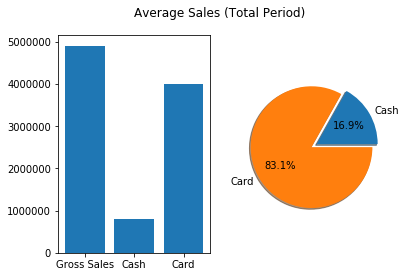

In [2]:
fig = plt.figure()

fig.suptitle('Average Sales (Total Period)')
a = BarPlotMean(cafehero, '2016-06', '2018-10', ['총매출', '현금영수금액', '카드영수금액'], 
                ['Gross Sales', 'Cash', 'Card'])
ax1 = fig.add_subplot(121)
ax1 = a.barplot_mean()

a = PiePlotMean(cafehero, '2016-06', '2018-10', ['현금영수금액', '카드영수금액'], ['Cash', 'Card'])
ax2 = fig.add_subplot(122)
ax2 = a.pieplot_mean()

plt.show()

# 매장의 규모를 점검
### 가장 최근 3개월 동안의 총매출 평균 시각화
### 가장 최근 3개월 동안의 카드매출과 현금매출의 액수 시각화, 비율 시각화

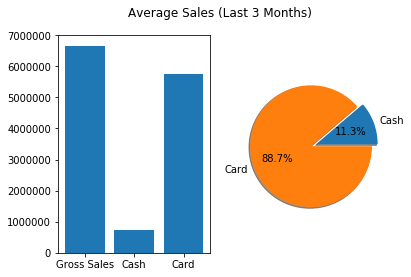

In [4]:
fig = plt.figure()

fig.suptitle('Average Sales (Last 3 Months)')
a = BarPlotMean(cafehero, '2018-08', '2018-10', ['총매출', '현금영수금액', '카드영수금액'], 
                ['Gross Sales', 'Cash', 'Card'])
ax1 = fig.add_subplot(121)
ax1 = a.barplot_mean()

a = PiePlotMean(cafehero, '2018-08', '2018-10', ['현금영수금액', '카드영수금액'], ['Cash', 'Card'])
ax2 = fig.add_subplot(122)
ax2 = a.pieplot_mean()

plt.show()

# 전체 기간동안 '순매출'과 '방문 팀 수'의 추이 관찰

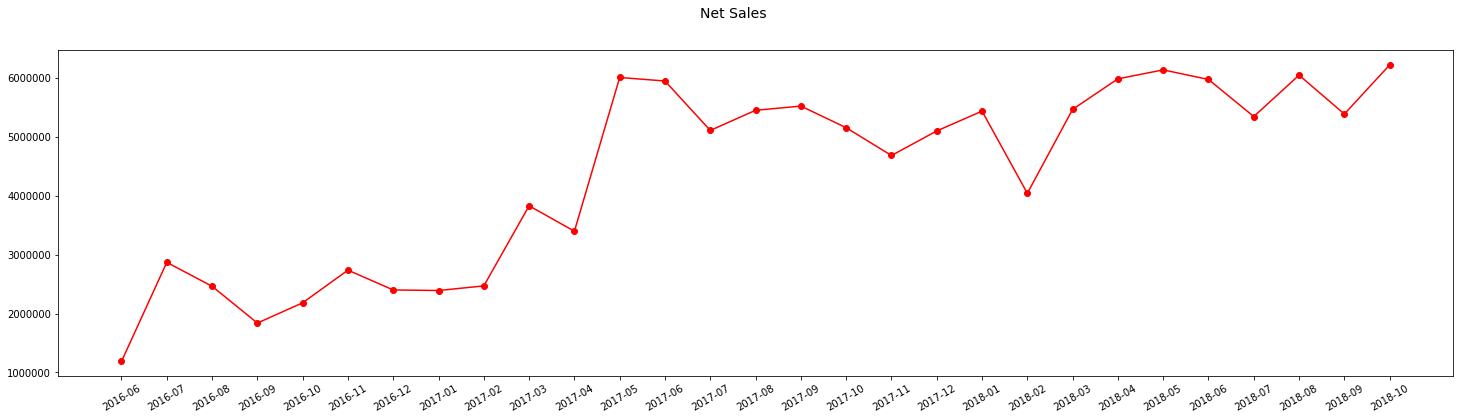

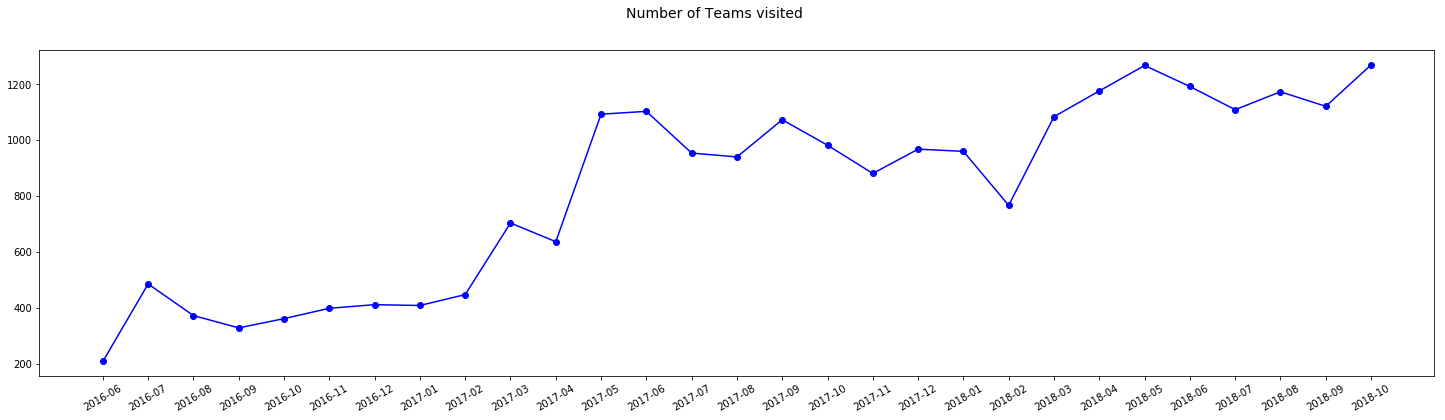

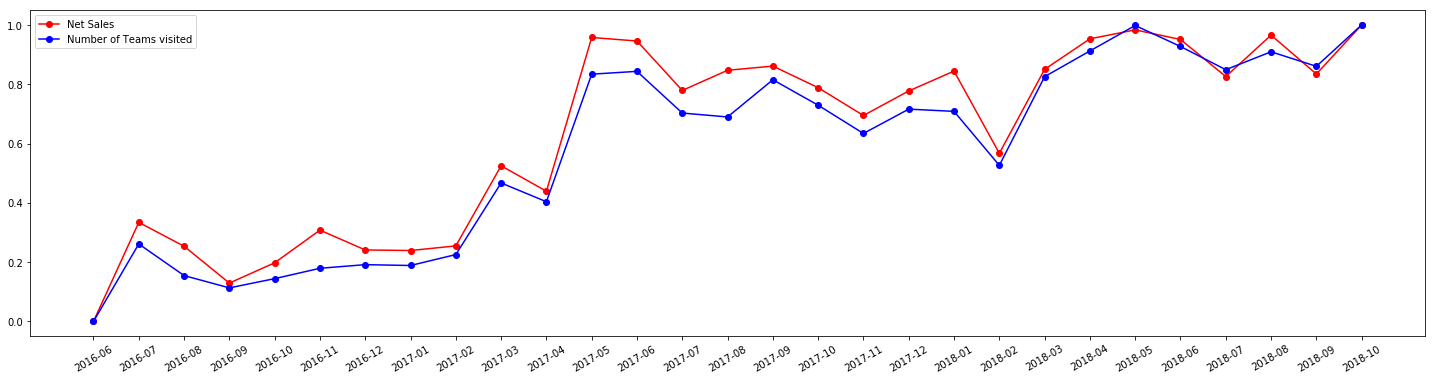

>> 매장의 '방문 팀 수'와 '순매출'이 꾸준한 증가 추세에 있습니다.


In [26]:
a = LinePlot(cafehero, '2016-06', '2018-10', '순매출')
a.show_one_lineplot("Net Sales", 'ro-')
plt.show()
print("")

a = LinePlot(cafehero, '2016-06', '2018-10', '고객수')
a.show_one_lineplot("Number of Teams visited", 'bo-')
plt.show()
print("")

a = LinePlot(cafehero, '2016-06', '2018-10', ['순매출', '고객수'])
a.show_lineplot_scaled(["Net Sales", "Number of Teams visited"], ['ro-', 'bo-'])
plt.show()

print(">> 매장의 '방문 팀 수'와 '순매출'이 꾸준한 증가 추세에 있습니다.")

# 카드 매출과 현금 매출

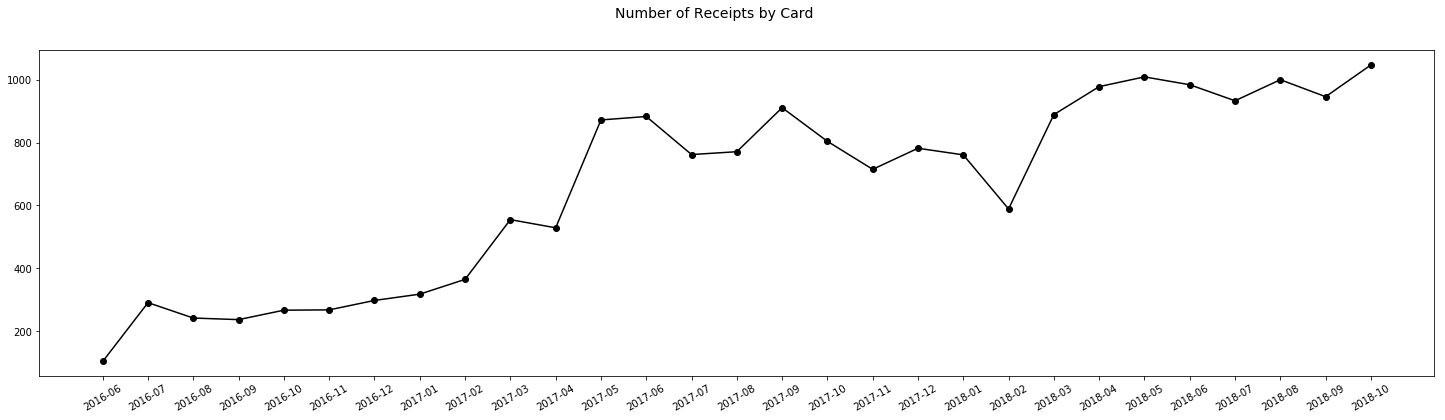

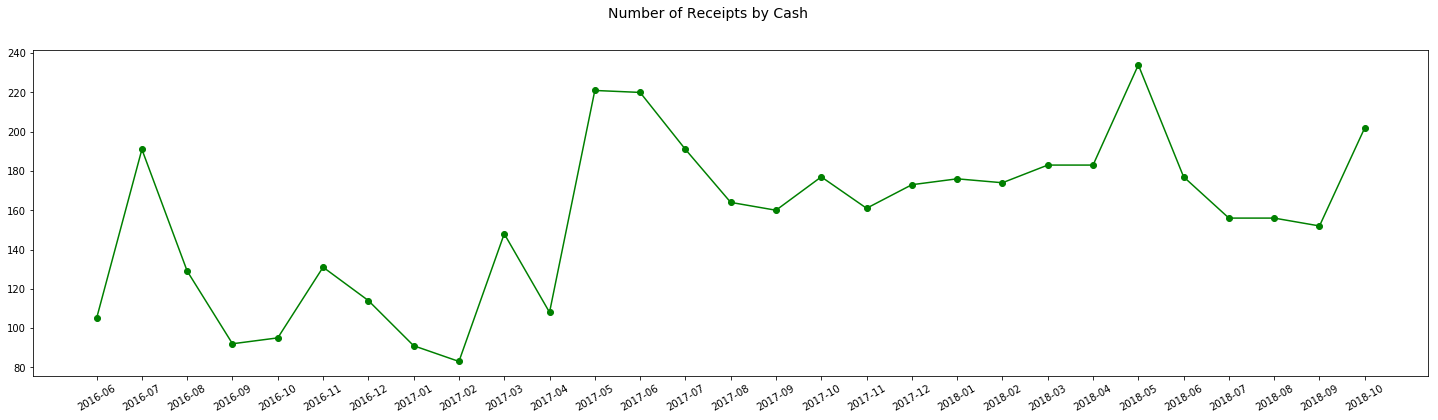

>> 매장의 '카드영수건수'와 '현금영수건수'가 꾸준한 증가 추세임을 알 수 있습니다.





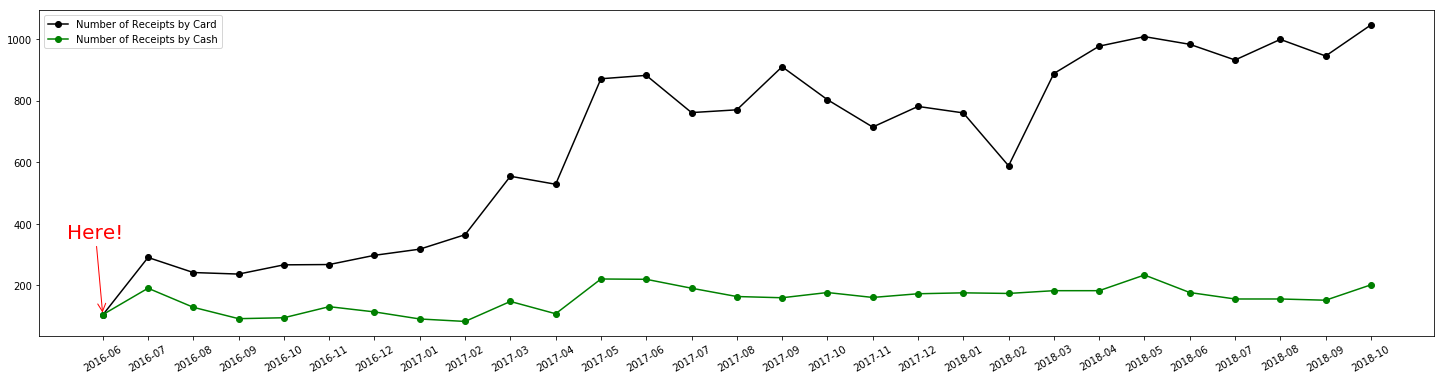

>> 매장의 영업 첫 달에는 '현금영수건수'(105건)와 '카드영수건수'(104건)가 거의 같았습니다.
>> 이 후에 '현금영수건수'의 증가폭에 비하여 '카드영수건수'의 증가폭이 훨씬 큽니다.




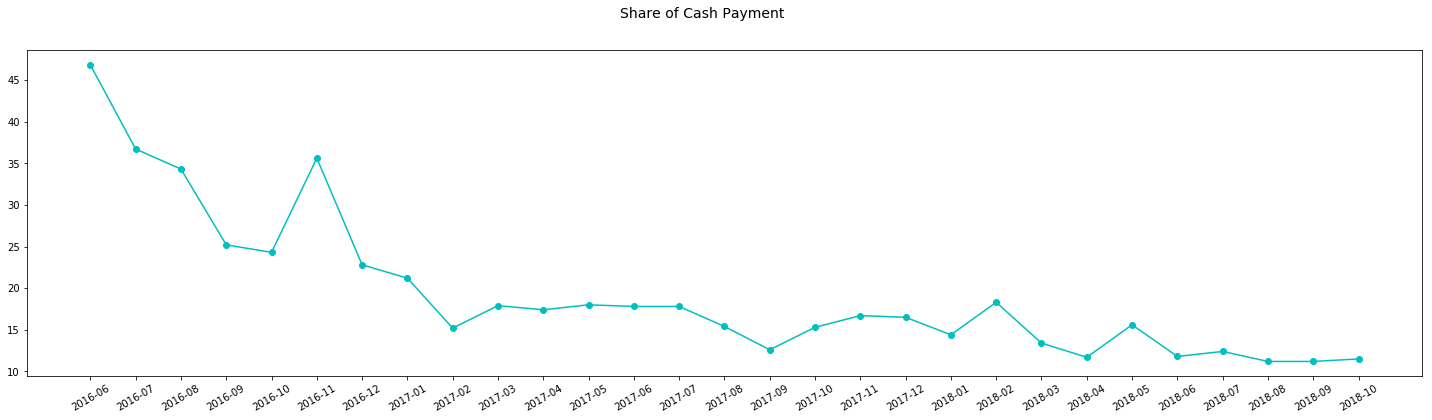

>> '현금매출비율'(Share of Cash Payment)이 큰 폭으로 감소합니다.



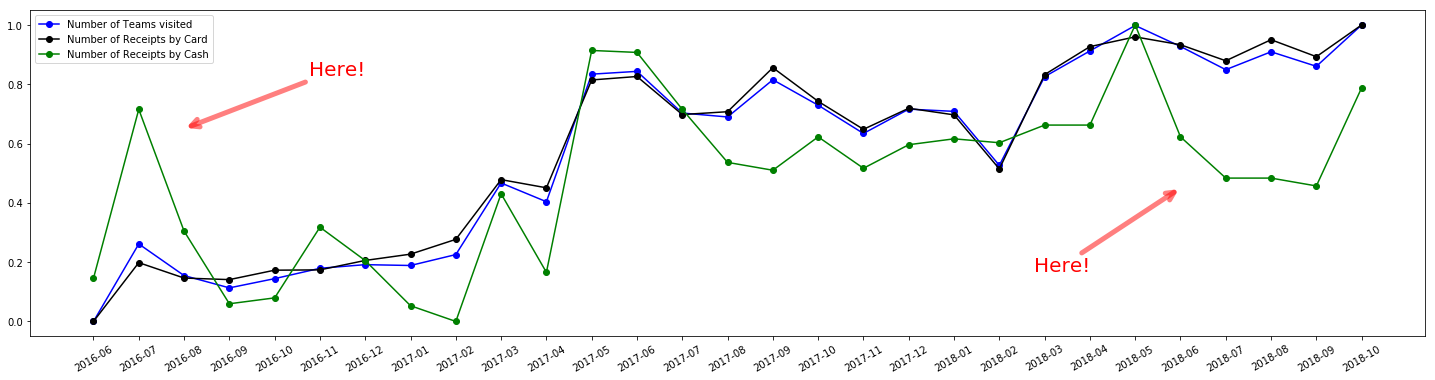

>> '카드영수건수'는 후반으로 갈 수록 '총매출'과의 이격도가 거의 없어집니다.
>> '현금영수건수'는 후반으로 갈 수록 '총매출'과의 이격도가 커집니다.

>> 이는 현금매출이 매장에 기여하는 비율이 점점 낮아지고 있음을 직관적으로 보여줍니다.
>> 좀 더 적극적으로 해석한다면, 카드를 많이 쓰는 연령대(20~40대)의 유입으로 매장이 성장했다고 분석할 수 있습니다.


In [27]:
a = LinePlot(cafehero, '2016-06', '2018-10', '카드영수건수')
a.show_one_lineplot("Number of Receipts by Card", 'ko-')
plt.show()

a = LinePlot(cafehero, '2016-06', '2018-10', '현금영수건수')
a.show_one_lineplot("Number of Receipts by Cash", 'go-')
plt.show()

print(">> 매장의 '카드영수건수'와 '현금영수건수'가 꾸준한 증가 추세임을 알 수 있습니다.\n\n\n")



a = LinePlot(cafehero, '2016-06', '2018-10', ['카드영수건수', '현금영수건수'])
fig = a.show_several_lineplot(["Number of Receipts by Card", "Number of Receipts by Cash"], ['ko-', 'go-'])
ax1 = fig.add_subplot(111)
# annotation
ax1.annotate('Here!', color = 'r', xy = ('2016-06', 105), xytext = (0.02, 0.3), textcoords = 'axes fraction', fontsize = 20,\
             arrowprops =  dict(arrowstyle = '->', color = 'r'))
plt.show()

print(">> 매장의 영업 첫 달에는 '현금영수건수'(%s건)와 '카드영수건수'(%s건)가 거의 같았습니다." 
      %(cafehero['현금영수건수'].loc['2016-06'], cafehero['카드영수건수'].loc['2016-06']))
print(">> 이 후에 '현금영수건수'의 증가폭에 비하여 '카드영수건수'의 증가폭이 훨씬 큽니다.\n\n")



a = LinePlot(cafehero, '2016-06', '2018-10', '현금매출비율')
a.show_one_lineplot("Share of Cash Payment", 'co-')
plt.show()

print(">> '현금매출비율'(Share of Cash Payment)이 큰 폭으로 감소합니다.\n")




a = LinePlot(cafehero, '2016-06', '2018-10', ['고객수', '카드영수건수', '현금영수건수'])
fig = a.show_lineplot_scaled(["Number of Teams visited", "Number of Receipts by Card", "Number of Receipts by Cash"], ['bo-', 'ko-', 'go-'])
ax2 = fig.add_subplot(111)
ax2.annotate('Here!', color = 'r', xy = ('2016-08', 0.65), xytext = (0.2, 0.8), textcoords = 'axes fraction', fontsize = 20,\
             arrowprops =  dict(arrowstyle = '->', color = 'r', alpha = 0.5, lw = '5'))  
ax2.annotate('Here!', color = 'r', xy = ('2018-06', 0.45), xytext = (0.72, 0.2), textcoords = 'axes fraction', fontsize = 20,\
             arrowprops =  dict(arrowstyle = '->', color = 'r', alpha = 0.5, lw = '5'))  
plt.show()


print(">> '카드영수건수'는 후반으로 갈 수록 '총매출'과의 이격도가 거의 없어집니다.")
print(">> '현금영수건수'는 후반으로 갈 수록 '총매출'과의 이격도가 커집니다.\n")


print(">> 이는 현금매출이 매장에 기여하는 비율이 점점 낮아지고 있음을 직관적으로 보여줍니다.")
print(">> 좀 더 적극적으로 해석한다면, 카드를 많이 쓰는 연령대(20~40대)의 유입으로 매장이 성장했다고 분석할 수 있습니다.")

# 객단가와 순매출

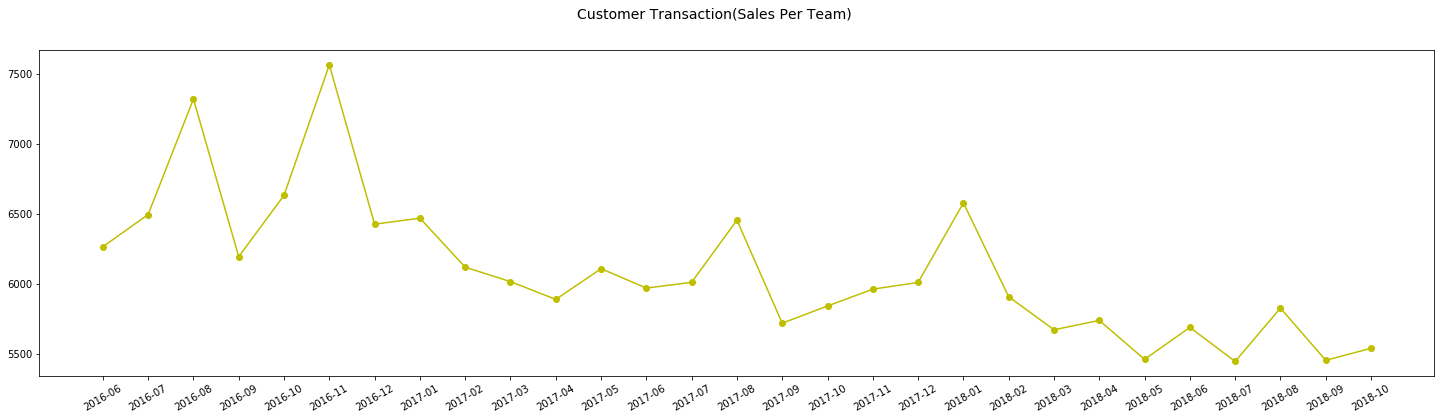

## '객단가'는 '손님 한 팀이 온다면 매장에 돈을 얼마나 쓰고가느냐'를 나타내는 지표라고 할 수 있습니다.
>> 객단가는 전반적으로 낮아지고 있습니다.



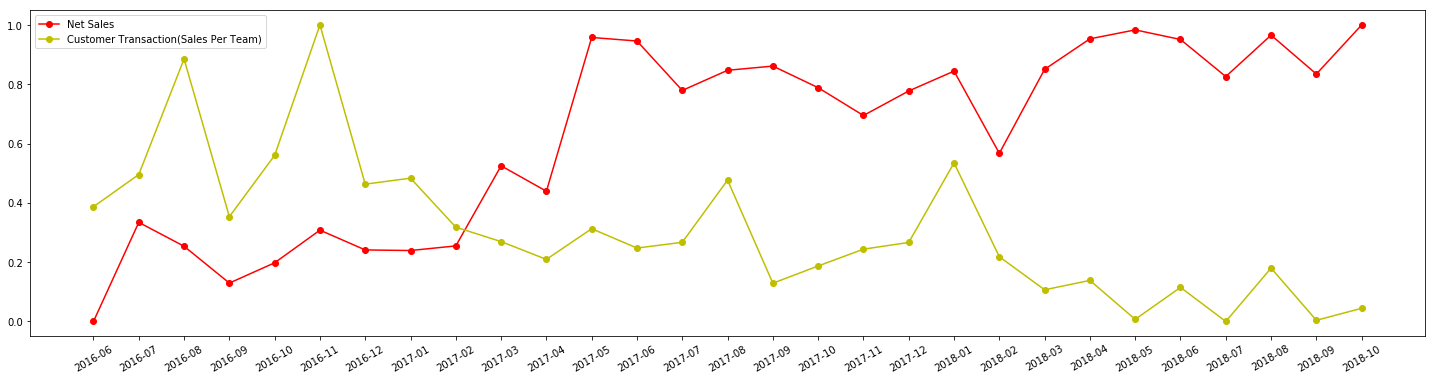

>> 객단가는 전반적으로 낮아지고 있음에도, 매장의 순매출이 늘어나는 모습입니다.
>> 이는 단체고객이 아닌 1인 단위의 고객 유입으로 매출 상승이 발생하였다고 분석할 수 있습니다.


In [6]:
a = LinePlot(cafehero, '2016-06', '2018-10', '객단가')
a.show_one_lineplot("Customer Transaction(Sales Per Team)", 'yo-')
plt.show()
print("## '객단가'는 '손님 한 팀이 온다면 매장에 돈을 얼마나 쓰고가느냐'를 나타내는 지표라고 할 수 있습니다.")
print(">> 객단가는 전반적으로 낮아지고 있습니다.\n")


a = LinePlot(cafehero, '2016-06', '2018-10', ['순매출', '객단가'])
a.show_lineplot_scaled(['Net Sales', 'Customer Transaction(Sales Per Team)'], ['ro-', 'yo-'])
plt.show()

print(">> 객단가는 전반적으로 낮아지고 있음에도, 매장의 순매출이 늘어나는 모습입니다.")
print(">> 이는 단체고객이 아닌 1인 단위의 고객 유입으로 매출 상승이 발생하였다고 분석할 수 있습니다.")

# Spider Chart로 보는 월별 매출

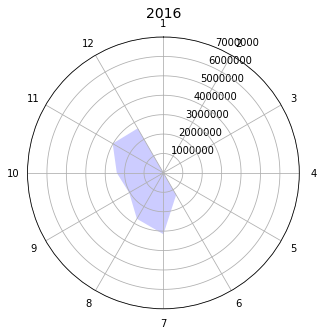

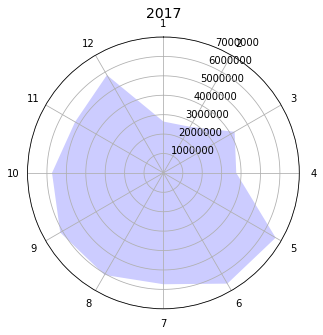

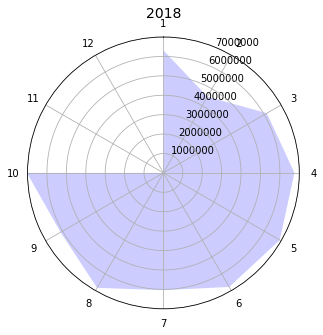

In [7]:
a = SpiderPlot(cafehero, '총매출')

a.spiderplot_per_year(2016)
a.spiderplot_per_year(2017)
a.spiderplot_per_year(2018)
plt.show()

print("\n")

# 기온과 총매출간의 관계

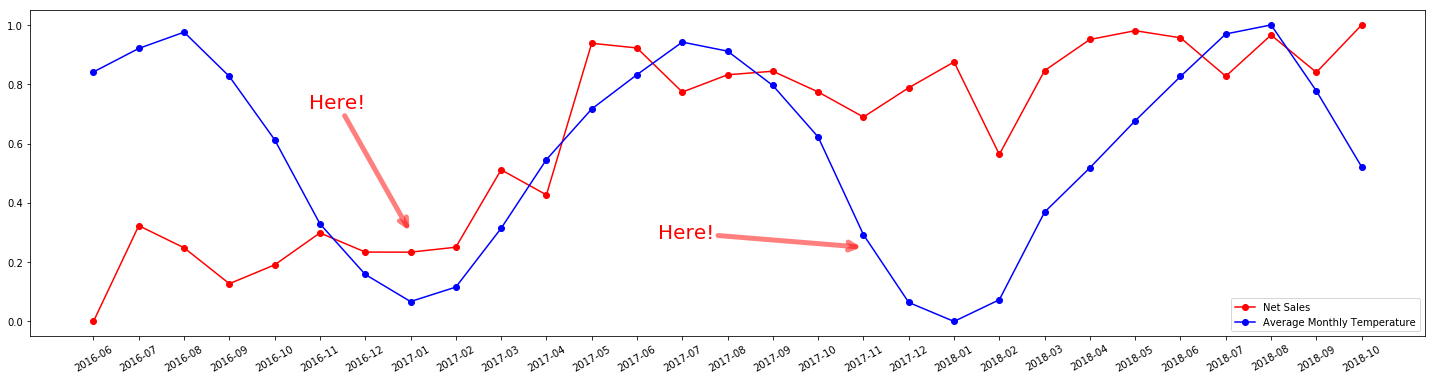

>> 월평균 기온과 매장의 총매출 추이는 어느정도 상관관계에 있는 모습입니다.
>> 2017년도~2018년도 겨울 비성수기 때 오는 매출 하락을 전년동기 대비 잘 방어하는 모습입니다.


In [52]:
a = LinePlot(cafehero, '2016-06', '2018-10', ['총매출', '월평균기온'])

a.show_lineplot_scaled(["Net Sales", "Average Monthly Temperature"], ['ro-', 'bo-'])

plt.annotate('Here!', color = 'r', xy = ('2017-11', 0.25), xytext = (0.45, 0.3), textcoords = 'axes fraction', fontsize = 20,\
             arrowprops =  dict(arrowstyle = '->', color = 'r', alpha = 0.5, lw = '5'))  
plt.annotate('Here!', color = 'r', xy = ('2017-01', 0.3), xytext = (0.2, 0.7), textcoords = 'axes fraction', fontsize = 20,\
             arrowprops =  dict(arrowstyle = '->', color = 'r', alpha = 0.5, lw = '5'))  

plt.show()

print(">> 월평균 기온과 매장의 총매출 추이는 어느정도 상관관계에 있는 모습입니다.")
print(">> 2017년도~2018년도 겨울 비성수기 때 오는 매출 하락을 전년동기 대비 잘 방어하는 모습입니다.")

# 카페의 여름매출 성장 vs 겨울매출 성장

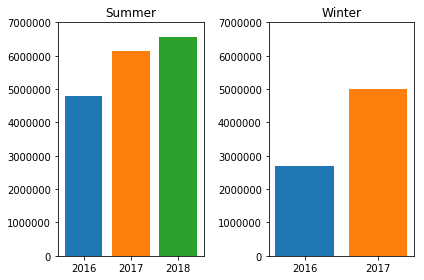

>> 매장이 성장하는 데에 있어 여름 매출 상승보다 겨울 매출 상승의 기여도가 크다는 것을 알 수 있습니다.
>> 차별화된 겨울 메뉴가 겨울 매출 상승에 기여한 것이라면, 차별화된 여름 메뉴의 개발도 제안할 수 있다.


In [59]:
fig = plt.figure()

a = BarPlotMean(cafehero, '2016-06', '2018-08', '총매출', '2016')
ax1 = fig.add_subplot(121)
ax1 = a.barplot_mean()

a = BarPlotMean(cafehero, '2017-06', '2017-08', '총매출', '2017')
ax1 = fig.add_subplot(121)
ax1 = a.barplot_mean()

a = BarPlotMean(cafehero, '2018-06', '2018-08', '총매출', '2018')

fig.add_subplot(121).title.set_text('Summer')
ax1 = fig.add_subplot(121)
ax1 = a.barplot_mean()

plt.ylim(0,7000000)



a = BarPlotMean(cafehero, '2016-12', '2017-02', '총매출', '2016')
ax1 = fig.add_subplot(122)
ax1 = a.barplot_mean()

a = BarPlotMean(cafehero, '2016-12', '2018-02', '총매출', '2017')

fig.add_subplot(122).title.set_text('Winter')
ax1 = fig.add_subplot(122)
ax1 = a.barplot_mean()

plt.ylim(0,7000000)


plt.tight_layout()
plt.show()

print(">> 매장이 성장하는 데에 있어 여름 매출 상승보다 겨울 매출 상승의 기여도가 크다는 것을 알 수 있습니다.")
print(">> 차별화된 겨울 메뉴가 겨울 매출 상승에 기여한 것이라면, 차별화된 여름 메뉴의 개발도 제안할 수 있다.")